# Introduction à seaborn

Présenté par TETEDE Diane

Seaborn est une bibliothèque Python de visualisation de données basée sur matplotlib. Il fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs.
Seaborn vous aide à explorer et à comprendre vos données. Ses fonctions de traçage fonctionnent sur des cadres de données et des tableaux contenant des ensembles de données entiers et effectuent en interne le mappage sémantique et l'agrégation statistique nécessaires pour produire des tracés informatifs. Son API déclarative orientée ensemble de données vous permet de vous concentrer sur la signification des différents éléments de vos tracés, plutôt que sur les détails de leur dessin.


voici un exemple de ce que fait seaborn : 

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

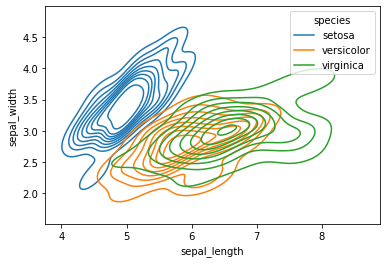

In [18]:
import seaborn as sns
df = sns.load_dataset("iris")
sns.kdeplot(x="sepal_length", y="sepal_width", data=df, hue="species")


La load_dataset()fonction permet accéder rapidement à un exemple d'ensemble de données. Il n'y a rien de spécial à propos de ces jeux de données : ce ne sont que des dataframes pandas. La plupart des exemples spécifieront des données à l'aide de dataframes pandas, mais seaborn est très flexible quant aux structures de données qu'il accepte.

# Installation seaborn

Pour installer seaborn : pip3 install seaborn

Les bibliothèques numpy, scipy, pandas, matplotlib seront installées pendant l'installation de seaborn si elle ne l'étaient pas.

# Les Abstractions d'API

La fonction replot()

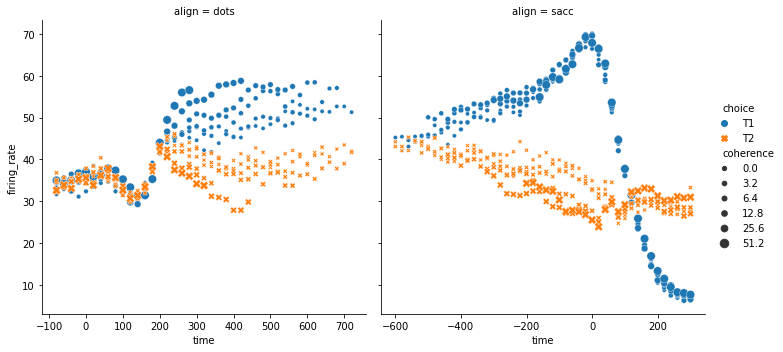

In [7]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="scatter",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

La fonction replot() se subdivise en deux type de fonction dont: la fonction scatterplot() et la fonction lineplot(). L'exemple précédente on a utiliser la fonction replot() de type scatterplot() . Essayons de voir à quoi ressemble le graphe avec la fonction lineplot():

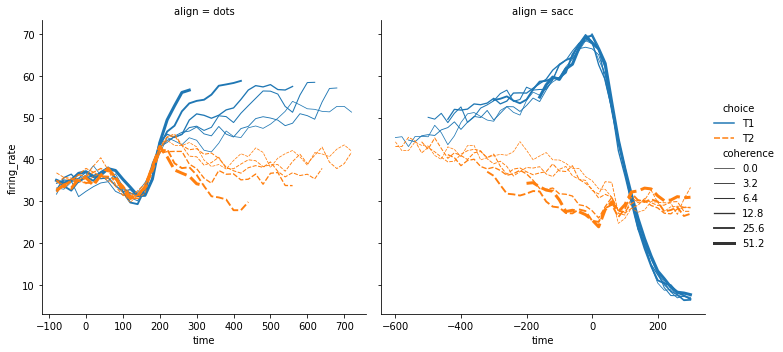

In [15]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

La fonction displot()



Une première étape dans tout effort d'analyse ou de modélisation des données devrait être de comprendre comment les variables sont distribuées. Les techniques de visualisation de la distribution des données peuvent fournir des réponses rapides à de nombreuses questions importantes. 

Le module distributions contient plusieurs fonctions conçues pour répondre à de telles questions. Les fonctions au niveau des axes sont histplot(), kdeplot(), ecdfplot()et rugplot(). Ils sont regroupés au sein des fonctions displot(), jointplot()et pairplot().

Il existe plusieurs approches différentes pour visualiser une distribution, et chacune a ses avantages et ses inconvénients relatifs. Il est important de comprendre ces facteurs afin que vous puissiez choisir la meilleure approche pour votre objectif particulier.


Exemple de code avec la fonction de distribution displot : 

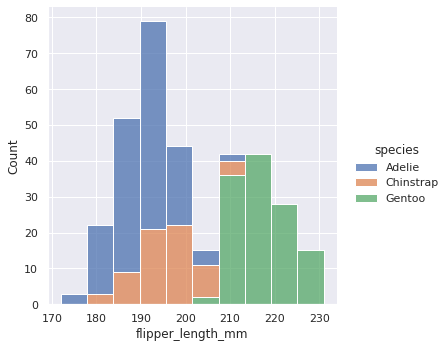

In [27]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Ces fonctions de visualisation de distribution de donnée permet:

    - Tracer des histogrammes univariés
    - Choisir la taille du bac
    - Visualiser des données bivariées; etc
    

3-La fonction catplot()


La fonction catplot() permet la tracé avec des données catégorielles. 
    
   Plusieurs types de parcelles spécialisées dans seaborn sont orientées vers la visualisation de données catégorielles. Ils sont accessibles via catplot(). 

Dans seaborn, il existe plusieurs manières de visualiser une relation impliquant des données catégorielles. Semblable à la relation entre relplot()et soit scatterplot()ou lineplot(), il existe deux façons de créer ces tracés. Il existe un certain nombre de fonctions au niveau des axes pour tracer des données catégorielles de différentes manières et une interface au niveau de la figure, catplot(), qui leur donne un accès unifié de niveau supérieur.

Il est utile de considérer les différents types d'intrigues catégorielles comme appartenant à trois familles différentes, dont nous parlerons en détail ci-dessous. Elles sont:

Nuages de points catégoriels :

    stripplot()(avec kind="strip"; la valeur par défaut)

    swarmplot()(avec kind="swarm")

Diagrammes de distribution catégoriels :

    boxplot()(avec kind="box")

    violinplot()(avec kind="violin")

    boxenplot()(avec kind="boxen")

Parcelles d'estimation catégorielles :

    pointplot()(avec kind="point")

    barplot()(avec kind="bar")

    countplot()(avec kind="count")

Ces familles représentent les données en utilisant différents niveaux de granularité. Au moment de décider lequel utiliser, vous devrez réfléchir à la question à laquelle vous souhaitez répondre.


Exemple de graphe avec la fonction catplot():

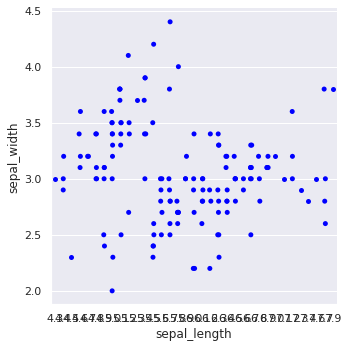

In [29]:
import seaborn as sns
df = sns.load_dataset("iris")
sns.catplot(x="sepal_length", y="sepal_width", data=df, color = "blue")


# Donnée multivariée

La foction pairplot() est une fonction qui adopte une vue plus large : elle montre les distributions conjointes et marginales pour toutes les relations par paires et pour chaque variable, respectivement :

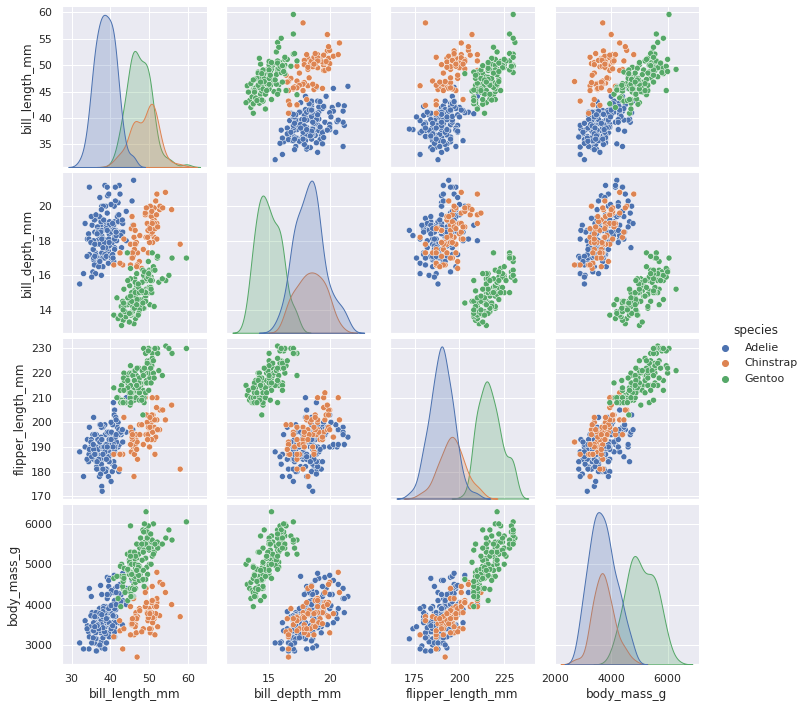

In [30]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.pairplot(data=penguins, hue="species")

 La fonction jointplot(); elle se concentre sur une seule relation. Il trace la distribution conjointe entre deux variables avec la distribution marginale de chaque variable :

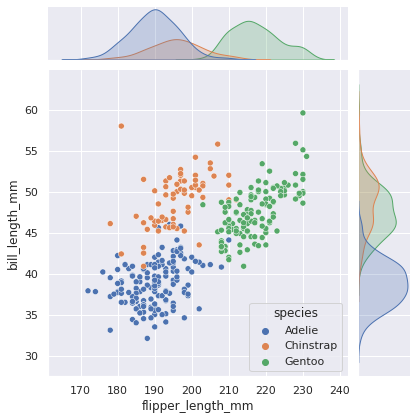

In [34]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")


# Autre fonctionnalités


Seaborn permet également d'écrire des fonctions qui permettent de créer des graphes complexes en combinant des fonctions de traçage au niveau des axes avec des objets qui gèrent la disposition de la figure, liant la structure d'un jeu de données à une grille d'axes. Les deux éléments font partie de l'API publique et on peut les utiliser directement pour créer des figures complexes avec seulement quelques lignes de code supplémentaires :

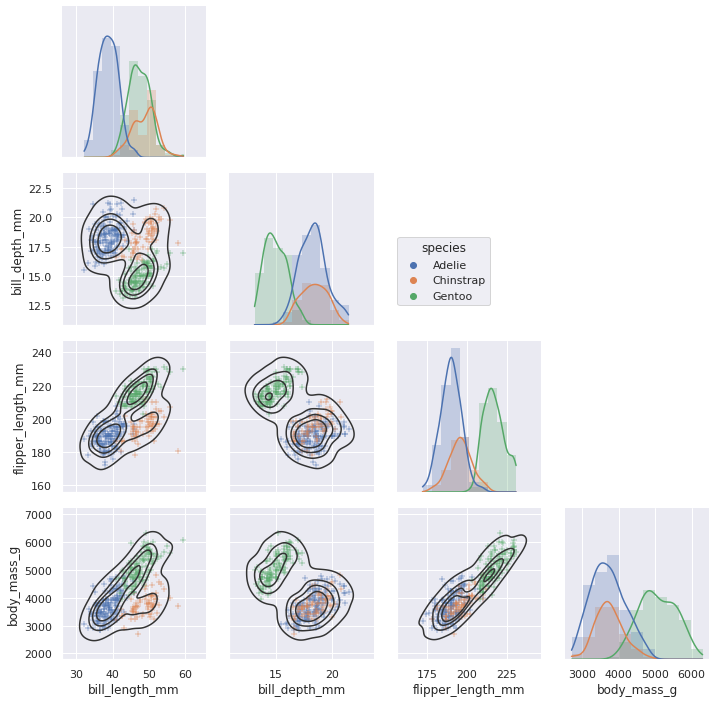

In [40]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))


On peut également peaufiner le chiffre au-delà de ce que permettent les valeurs par défaut. Seaborn permet plusieurs niveaux de personnalisation. Il définit plusieurs thèmes intégrés qui s'appliquent à toutes les figures, ses fonctions ont des paramètres standardisés qui peuvent modifier les mappages sémantiques pour chaque tracé, et des arguments de mots clés supplémentaires sont transmis aux artsts matplotlib sous-jacents, permettant encore plus de contrôle. 

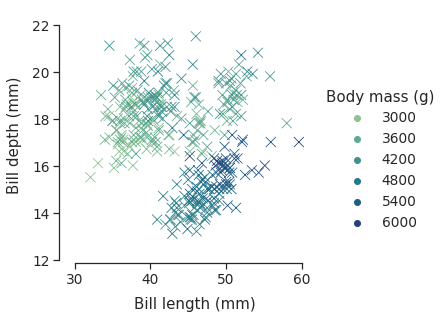

In [41]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

# Autres essaies de fonctions

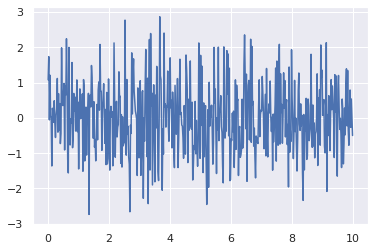

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x,y)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

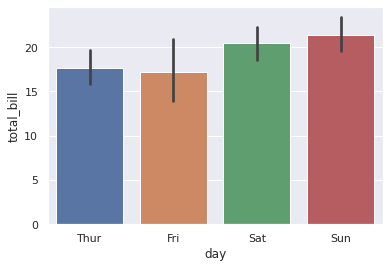

In [37]:
import seaborn as sns
tips = sns.load_dataset("tips")
sns.barplot (x = "day", y = "total_bill", data = tips)

# Merci pour votre attention ;)